In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/student_data.csv')
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


- 시각화 포함 탐색적 자료분석
    1. target파악
    2. 결측치
    3. boxplot으로 이상치 파악
    4. histogram
    5. 상관관계

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


- target은 grade로 보임

In [4]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [5]:
df[df.isna().any(1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [6]:
df.groupby('grade').mean()

,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
grade,,,,,,,,,
1,4.000000,3.000000,2.000000,1.000000,1.000000,5.000000,0.000000,4.000000,0.000000
2,4.428571,3.857143,4.428571,1.142857,1.714286,3.857143,0.000000,6.142857,0.000000
3,4.666667,3.333333,3.666667,1.333333,2.333333,4.666667,0.000000,9.000000,0.000000
4,3.533333,2.733333,2.800000,1.333333,2.066667,4.200000,0.533333,6.866667,4.733333
5,3.916667,3.666667,3.583333,1.666667,2.500000,2.416667,6.833333,6.583333,6.500000
6,3.705882,3.117647,3.529412,1.529412,2.117647,3.352941,5.562500,7.588235,6.941176
7,3.842105,3.315789,3.315789,1.500000,2.842105,4.000000,6.473684,7.052632,7.315789
8,3.896552,3.214286,3.344828,1.551724,2.392857,3.793103,7.821429,7.793103,8.103448
9,4.060000,3.183673,3.041667,1.612245,2.540000,3.460000,8.540000,8.700000,9.080000


In [7]:
numerical_cols = list(df.columns[(df.dtypes =='float')]) + list(df.columns[(df.dtypes =='int')])
object_cols = list(df.columns[df.dtypes == 'object'])

- 숫자형 변수 boxplot으로 이상치 탐지하기

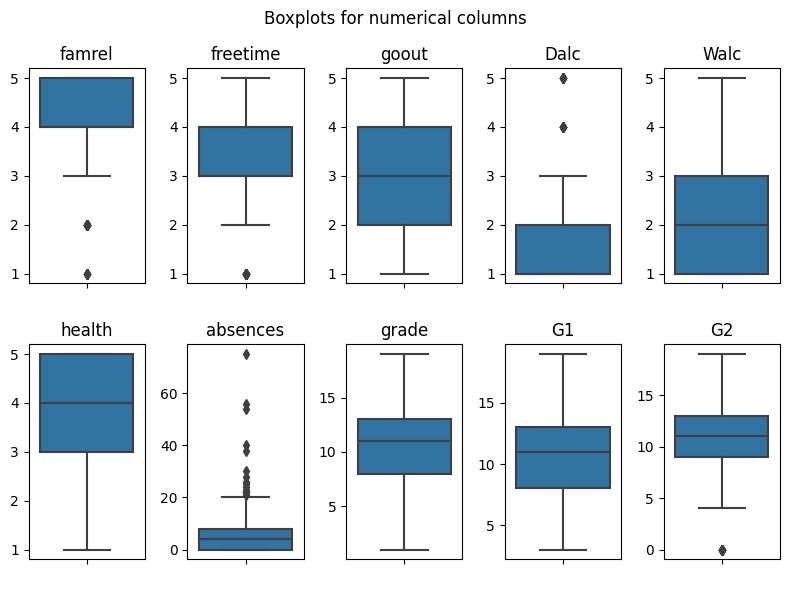

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 6))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx//5][idx%5]
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col)
    ax.set_xticklabels(' ')
    
fig.suptitle('Boxplots for numerical columns')
fig.tight_layout()
plt.show()

- boxplot을 그려 이상치를 확인했을 때, famrel, freetime, goout, Dalc, absences, G2에 이상치가 확인되며, absences 변수에는 다량의 이상치가 확인된다

In [15]:
plt.rcParams['font.family'] = 'AppleGothic'

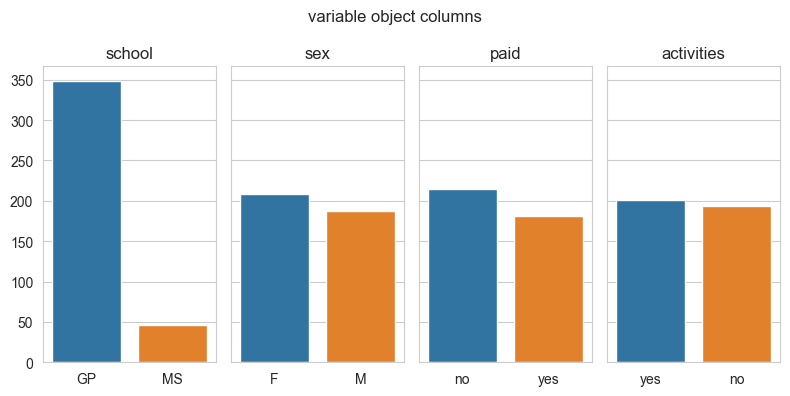

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 4), sharey=True)
sns.set_style('whitegrid')

for idx, col in enumerate(object_cols):
    ax = axes[idx]
    cnt_df = df[col].value_counts()
    sns.barplot(x=cnt_df.index, y=cnt_df.values, ax=ax)
    ax.set_title(col, fontsize=12)

fig.suptitle('variable object columns')
fig.tight_layout()
plt.show()

- value들의 분포를 보았을 때, school분포의 차이가 크므로 유의하여 모델링해야한다

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:7: Us

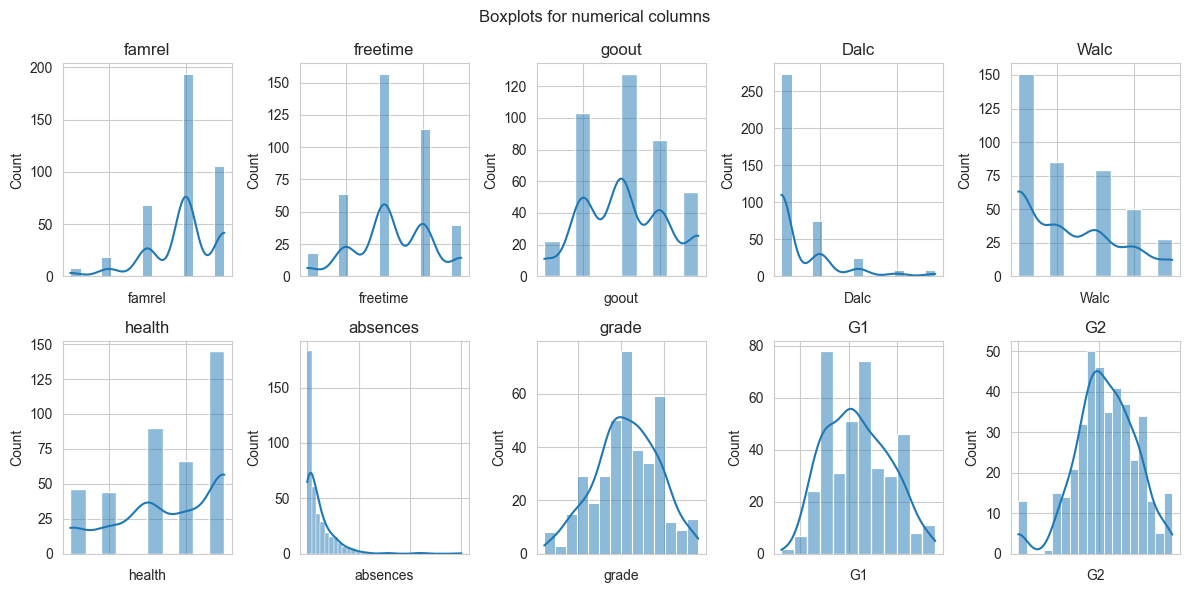

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx//5][idx%5]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)
    ax.set_xticklabels(' ')
    
fig.suptitle('Boxplots for numerical columns')
fig.tight_layout()
plt.show()

In [28]:
cor_df = df.corr()

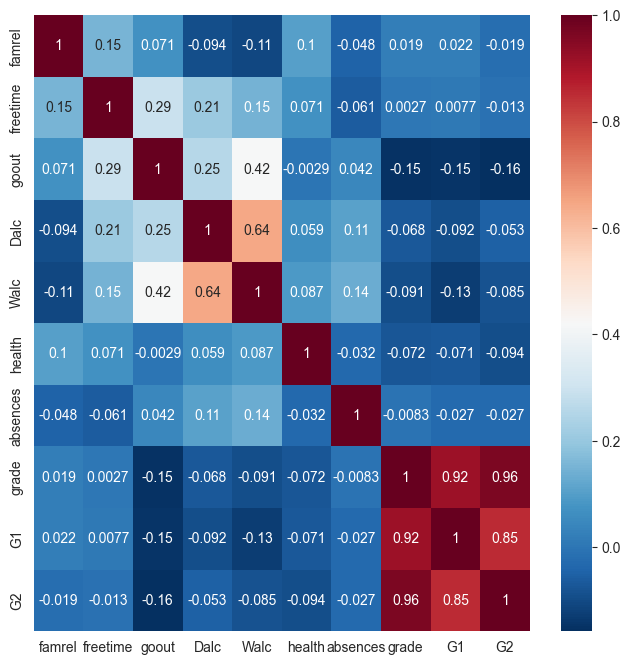

In [31]:
plt.figure(figsize=(8, 8))
sns.heatmap(cor_df, cmap='RdBu_r', annot=True)
plt.show()

- grade, G1, G2변수의 상관관계가 매우 높으므로 다중공선성에 주의해서 모델링할 필요가 있다.

# 2. 결측치를 식별 예측하는 두가지 방법을 쓰고, 이를 선택한 이유를 설명

- KNNImputer
- fillna


fillna method로 평균값으로 대체하는 방법과 KNN Imputer로 유사한 N개의 다른 샘플을 찾아 유사한 값을 대체하는 방법이 있다. 데이터의 특징을 담아내기 위해 KNNImputer를 사용하였다.

In [42]:
help(KNNImputer)

Help on class KNNImputer in module sklearn.impute._knn:

class KNNImputer(sklearn.impute._base._BaseImputer)
 |  KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)
 |  
 |  Imputation for completing missing values using k-Nearest Neighbors.
 |  
 |  Each sample's missing values are imputed using the mean value from
 |  `n_neighbors` nearest neighbors found in the training set. Two samples are
 |  close if the features that neither is missing are close.
 |  
 |  Read more in the :ref:`User Guide <knnimpute>`.
 |  
 |  .. versionadded:: 0.22
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan or None, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      should be set to np.nan, since `pd.NA` will be converted to np

In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(df[numerical_cols])

df_notnull = df.copy()
df_notnull[numerical_cols] = imputer.transform(df[numerical_cols])

In [40]:
df_notnull.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [47]:
df_notnull_mean = df.copy()

df_notnull_mean = df_notnull_mean.fillna(df.mean())

In [53]:
null_index = df[df.isna().any(1)].index

In [48]:
df_notnull_mean.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [55]:
df.loc[null_index]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [56]:
df_notnull.loc[null_index]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,2.6,1.0,1.0,5.0,0.0,15.0,14.0,15.0
14,GP,M,no,no,4.4,5.0,2.0,1.0,1.0,3.0,0.0,15.0,14.0,16.0
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,7.0,14.0,14.0,14.0
25,GP,F,yes,no,1.0,2.0,2.0,1.0,3.2,5.0,14.0,8.0,6.0,9.0
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,3.2,8.0,13.0,14.0,13.0
40,GP,F,no,yes,3.0,3.0,3.8,1.0,2.0,3.0,25.0,9.0,7.0,10.0
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,4.4,2.0,7.0,7.0,7.0
61,GP,F,no,yes,5.0,5.0,5.0,2.8,5.0,5.0,6.0,10.0,10.0,8.0
71,GP,M,no,no,3.0,3.0,3.0,1.0,1.0,3.0,0.0,10.0,10.0,10.0
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,3.6,6.0,7.0,6.0


In [57]:
df_notnull_mean.loc[null_index]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.000000,5.000000,3.114796,1.000000,1.000000,5.00000,0.00000,15,14,15
14,GP,M,no,no,3.944162,5.000000,2.000000,1.000000,1.000000,3.00000,0.00000,15,14,16
15,GP,F,no,no,4.000000,4.000000,4.000000,1.000000,2.000000,2.00000,5.67602,14,14,14
25,GP,F,yes,no,1.000000,2.000000,2.000000,1.000000,2.284987,5.00000,14.00000,8,6,9
39,GP,F,yes,yes,4.000000,3.000000,1.000000,1.000000,1.000000,3.56266,8.00000,13,14,13
40,GP,F,no,yes,3.000000,3.000000,3.114796,1.000000,2.000000,3.00000,25.00000,9,7,10
49,GP,F,no,yes,4.000000,4.000000,4.000000,1.000000,1.000000,3.56266,2.00000,7,7,7
61,GP,F,no,yes,5.000000,5.000000,5.000000,1.470588,5.000000,5.00000,6.00000,10,10,8
71,GP,M,no,no,3.000000,3.000000,3.000000,1.470588,1.000000,3.00000,0.00000,10,10,10
82,GP,F,yes,no,4.000000,4.000000,4.000000,1.000000,1.000000,5.00000,5.67602,6,7,6


# 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오
- 머신러닝 모델을 적용하고자 하는 경우, 범주형 변수를 인풋값으로 받을 수 없기 때문에 변환이 필요하다. 
- 인코딩은 대표적으로 LabelEncoding과 OneHotEncoding이 있다. 숫자의 크기를 모델이 학습하여 영향을 미칠 수 있기 때문에 원핫인코딩을 사용하여 변환을 적용하였다.

In [58]:
df_onehot = pd.get_dummies(df_notnull)
df_onehot

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_GP,school_MS,sex_F,sex_M,paid_no,paid_yes,activities_no,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,1,0,1,0,1,0,1,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,1,0,1,0,1,0,1,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,1,0,1,0,0,1,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,1,0,1,0,0,1,0,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,0,1,0,1,0,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,0,1,0,1,1,0,1,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,0,1,0,1,1,0,1,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,0,1,0,1,1,0,1,0


# 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오
- 학습, 검증용 데이터를 분할하는 방법은 랜덤분할과 층화추출 분할이 있다.
- 랜덤분할은 랜덤으로 분할하는 것이고, 층화추출 분할은 범주형 변수의 분포를 고려하여 동일한 분포를 가질 수 있게 분할하는 것이다.
- 본 데이터 셋은 target값이 연속형 변수이므로, 회귀분석을 진행할 예정이다. 따라서 층화추출분할이 아닌 랜덤 분할을 사용한다.

In [83]:
from sklearn.model_selection import train_test_split

X = df_onehot.drop(['grade'], axis=1)
y = df_onehot['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(316, 17) (316,)
(79, 17) (79,)


# svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오

- 공통점 : 회귀분석과 분류분석 둘 다 가능한 알고리즘이다. 과적합되기 쉬우므로 과적합을 방지하기 위한 하이퍼파라미터가 있다.
- 회귀분석에 사용할 수 있으므로 전부 학생성적 예측 분석에 적합하다.

In [84]:
import time

In [85]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# 모델 학습

## svm
svm = SVR()
start = time.time()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_time = time.time() - start

## xgboost
xgb = XGBRegressor(n_estimators=1000, max_depth=8)
start = time.time()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_time = time.time() - start

## RandomForest
RF = RandomForestRegressor(max_depth=8)
start = time.time()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
RF_time = time.time() - start


In [86]:
# 성능 검증
from sklearn.metrics import mean_squared_error, r2_score

svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)
print('==== SVM ====')
print('MSE \t{:.4f}'.format(svm_mse))
print('R2 \t{:.4f}'.format(svm_r2))
print('time \t{:.4f}'.format(svm_time))
print()

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print('==== XGB ====')
print('MSE \t{:.4f}'.format(xgb_mse))
print('R2 \t{:.4f}'.format(xgb_r2))
print('time \t{:.4f}'.format(xgb_time))
print()

RF_mse = mean_squared_error(y_test, RF_pred)
RF_r2 = r2_score(y_test, RF_pred)
print('==== RandomForest ====')
print('MSE \t{:.4f}'.format(RF_mse))
print('R2 \t{:.4f}'.format(RF_r2))
print('time \t{:.4f}'.format(RF_time))
print()

==== SVM ====
MSE 	1.1511
R2 	0.9321
time 	0.0199

==== XGB ====
MSE 	0.6411
R2 	0.9622
time 	0.2111

==== RandomForest ====
MSE 	0.6998
R2 	0.9587
time 	0.1016



- 성능차원 : r2 스코어와, MSE는 XGB > RandomForest > SVM 순으로 높으며,
- 시간 차원 : SVM > RandomForest > XGB 순으로 적게걸린다.

- RandomForest 모델이 XGB와 유사한 성능을 가졌고, 시간이 절반 이하로 소요되므로 RandomForest 모델이 적합해 보인다.

- 보완가능한 부분은 max_depth, min_sample_leaf등 과적합을 방지하기 위한 하이퍼파라미터를 튜닝해가며 더 좋은 성능을 가진 모델을 개발할 수 있을 것으로 보인다.
- 과적합이 쉽게 되는 모델이므로 더 많은 데이터로 검증을 할 필요가 있으며, 데이터를 추가 확보하여 재학습해 일반화 성능을 높일 필요가 있다.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

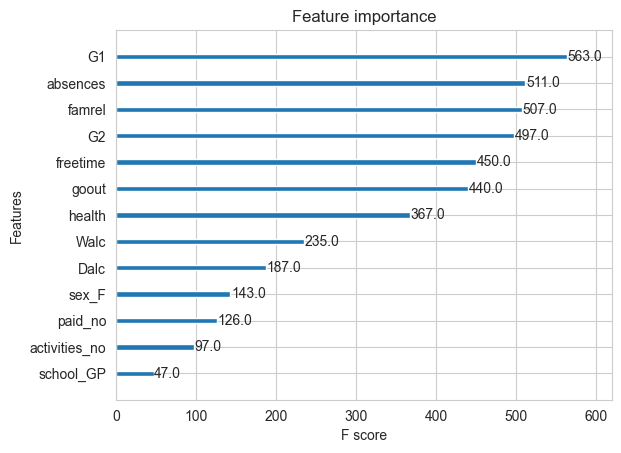

In [96]:
from xgboost import plot_importance
plot_importance(xgb)

# 통계분석

In [98]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Linear Regression')
print('R2 \t{:.6f}'.format(lr_r2))
print('MSE \t{:.6f}'.format(lr_rmse))

Linear Regression
R2 	0.615886
MSE 	5.592657


In [111]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [114]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_ridge = GridSearchCV(ridge, param_grid=param_grid, scoring='r2', cv=5)

grid_ridge.fit(X_train, y_train)
ridge_result = pd.DataFrame(grid_ridge.cv_results_)
ridge_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017257,0.009054,0.000244,0.000049,0,{'alpha': 0},0.822823,0.814642,0.718582,0.803935,0.933758,0.818748,0.068576,11
1,0.000960,0.000184,0.000266,0.000094,0.1,{'alpha': 0.1},0.873242,0.763588,0.905385,0.869179,0.923231,0.866925,0.055449,1
2,0.000791,0.000067,0.000202,0.000053,0.2,{'alpha': 0.2},0.875304,0.761070,0.900808,0.856879,0.919334,0.862679,0.055102,2
3,0.000788,0.000036,0.000175,0.000008,0.3,{'alpha': 0.3},0.874072,0.760397,0.896488,0.846541,0.915804,0.858660,0.054289,3
4,0.000729,0.000011,0.000168,0.000008,0.4,{'alpha': 0.4},0.872115,0.759921,0.892663,0.837735,0.912694,0.855026,0.053625,4
5,0.000701,0.000028,0.000163,0.000010,0.5,{'alpha': 0.5},0.870024,0.759338,0.889201,0.830085,0.909892,0.851708,0.053153,5
6,0.000749,0.000052,0.000204,0.000077,0.6,{'alpha': 0.6},0.867973,0.758600,0.885998,0.823328,0.907319,0.848643,0.052840,6
7,0.000721,0.000023,0.000167,0.000014,0.7,{'alpha': 0.7},0.866019,0.757724,0.882987,0.817279,0.904922,0.845786,0.052646,7
8,0.000716,0.000014,0.000158,0.000005,0.8,{'alpha': 0.8},0.864175,0.756737,0.880123,0.811805,0.902668,0.843101,0.052538,8
9,0.000725,0.000020,0.000173,0.000019,0.9,{'alpha': 0.9},0.862441,0.755667,0.877375,0.806808,0.900533,0.840565,0.052492,9


In [116]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
r2 = r2_score(y_test, ridge_pred)
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('R2 \t{:.6f}'.format(r2))
print('RMSE \t{:.6f}'.format(rmse))

R2 	0.746382
RMSE 	4.544412


In [121]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid = {'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_lasso = GridSearchCV(lasso, param_grid=param_grid, scoring='r2', cv=20)

grid_lasso.fit(X_train, y_train)
lasso_result = pd.DataFrame(grid_lasso.cv_results_)
lasso_result

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.313e+02, tolerance: 3.247e+00 Linear regression models with null weight for the l1 regularization term are more efficiently f

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.561e+02, tolerance: 3.292e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coo

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.727e+02, tolerance: 3.151e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coo

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026855,0.002347,0.000241,0.000070,0,{'alpha': 0},0.843924,0.915615,0.839075,0.566372,...,0.787539,0.847615,0.829026,0.950101,0.940278,0.868656,0.894850,0.809129,0.128600,1
1,0.000952,0.000295,0.000161,0.000008,0.1,{'alpha': 0.1},0.821875,0.818413,0.845529,0.635959,...,0.400076,0.597287,0.872399,0.944698,0.734155,0.867112,0.774873,0.733110,0.143214,2
2,0.001015,0.000387,0.000171,0.000021,0.2,{'alpha': 0.2},0.793723,0.783798,0.833998,0.635378,...,0.379682,0.562072,0.807513,0.911002,0.699335,0.839093,0.726714,0.705003,0.123439,3
3,0.001209,0.000296,0.000156,0.000001,0.3,{'alpha': 0.3},0.767354,0.754946,0.820449,0.618198,...,0.375824,0.531790,0.732635,0.867292,0.654461,0.803188,0.683143,0.678868,0.106932,4
4,0.001402,0.000280,0.000183,0.000058,0.4,{'alpha': 0.4},0.728068,0.719781,0.795631,0.588562,...,0.367415,0.492280,0.648822,0.806498,0.600374,0.758224,0.630805,0.640286,0.097537,5
5,0.001163,0.000300,0.000191,0.000113,0.5,{'alpha': 0.5},0.681109,0.678601,0.759421,0.545392,...,0.354177,0.441927,0.552358,0.732267,0.536729,0.698668,0.571574,0.590649,0.093382,6
6,0.000774,0.000066,0.000167,0.000035,0.6,{'alpha': 0.6},0.621127,0.629260,0.708806,0.489448,...,0.335369,0.378428,0.479782,0.645133,0.462855,0.622778,0.503255,0.529856,0.092653,7
7,0.000721,0.000068,0.000162,0.000019,0.7,{'alpha': 0.7},0.554061,0.570585,0.644837,0.425506,...,0.310271,0.311171,0.403800,0.572003,0.393239,0.545715,0.443123,0.465890,0.092875,8
8,0.000703,0.000055,0.000154,0.000002,0.8,{'alpha': 0.8},0.479901,0.482734,0.566374,0.354069,...,0.279635,0.238838,0.329328,0.488738,0.315459,0.452879,0.379504,0.391973,0.091538,9
9,0.000645,0.000078,0.000154,0.000002,0.9,{'alpha': 0.9},0.411116,0.398006,0.481409,0.281253,...,0.250587,0.170615,0.279979,0.422150,0.246798,0.370132,0.313440,0.325438,0.086151,10


In [119]:
lasso = Lasso(alpha=0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
r2 = r2_score(y_test, lasso_pred)
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('R2 \t{:.6f}'.format(r2))
print('RMSE \t{:.6f}'.format(rmse))

R2 	0.690188
RMSE 	5.022699


/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mod

# 다항회귀분석 시각화

In [144]:
plot_x

[-2.9875949245715923, 2.8941483199374254]

In [145]:
plot_x = list(X[X.argmin()]) + list(X[X.argmax()])
plot_y = list(y[X.argmin()]) + list(y[X.argmax()])

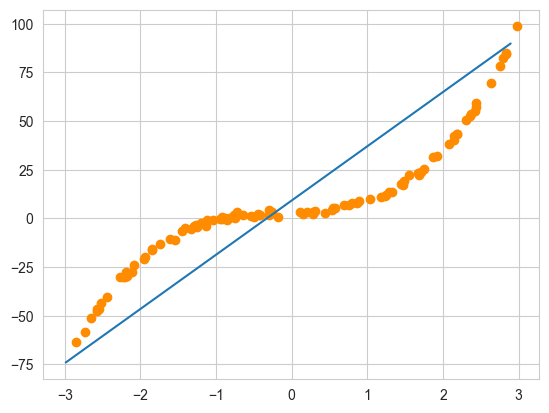

In [176]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X**3 + X**2 + 2* X +3 + np.random.randn(m, 1)
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1,1)
plt.scatter(X, y, color='darkorange')
plt.plot(plot_x, plot_y)

In [177]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [178]:
x_pred = lr.predict(X_poly)

In [179]:
lr.coef_

array([[0.        , 2.00687625, 0.98066962, 3.02656127]])

In [181]:
line_poly = poly_reg.transform(line)

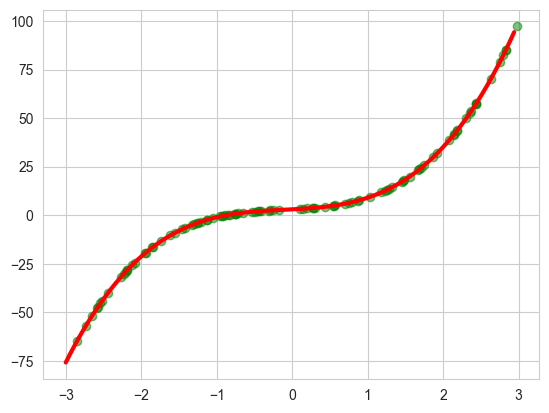

In [189]:
plt.plot(line, lr.predict(line_poly), linewidth=3, color='red')
plt.scatter(X, x_pred, color='green', alpha=0.5)


# ANOVA 이원분산분석

In [191]:
avocado = pd.read_csv('../data/avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [194]:
avocado['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [196]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [215]:
new_avocado = avocado[avocado['region'].str.contains('Boston|Chicago|Orlando')]

In [216]:
new_avocado['region'].value_counts()

Chicago    338
Orlando    338
Boston     338
Name: region, dtype: int64

In [221]:
new_avocado = new_avocado[['AveragePrice', 'type', 'region']]

In [224]:
import scipy.stats as stats
stats.shapiro(new_avocado['AveragePrice']) # 정규성을 만족하지 않음

ShapiroResult(statistic=0.9835005402565002, pvalue=2.6831357136103406e-09)

In [229]:
new_avocado.reset_index(drop=True, inplace=True)

In [231]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~ C(type) + C(region) + C(type):C(region)'
model = ols(formula, new_avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


### 귀무가설
1. type과 region은 서로 교호작용이 없다.
    - p-value가 0.05 이하이므로 유의수준 0.05하에서 귀무가설이 기각된다.
    - 따라서, 서로 교호작용이 있다.
2. type에 따른 AveragePrice값에는 차이가 없다.
    - p-value가 0.05 이하이므로 유의수준 0.05하에서 귀무가설이 기각된다.
    - 따라서, type에 따라 AveragePrice 값에는 차이가 있다.
    - 또한 F-통계량이 828로 다른 변수에 비해 상당히 크므로 type에 따른 AveragePrice 차이가 크다고 볼 수 있다.
3. region에 따른 AveragePrice값에는 차이가 없다.
    - p-value가 0.05 이하이므로 유의수준 0.05하에서 귀무가설이 기각된다.
    - 따라서, region에 따라 AveragePrice 값에는 차이가 있다.
    
- 이원분산분석은 교호작용이 없을때 제대로 검정할 수 있으므로, 본 검정은 유의하다고 보기 어렵다.

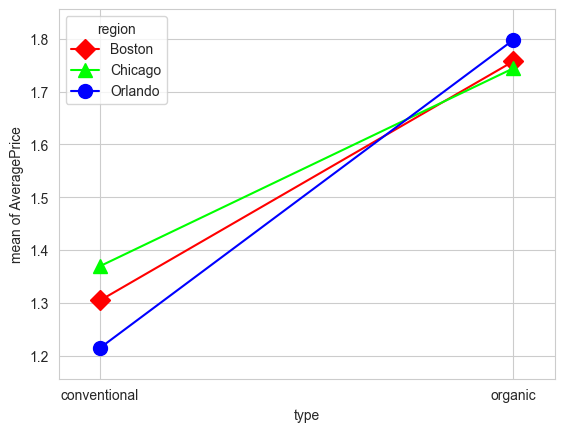

In [235]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

type_ = new_avocado['type']
region = new_avocado['region']
price = new_avocado['AveragePrice']

interaction_plot(type_, region, price, markers=['D', '^', 'o'], ms=10)
plt.show()

- 사후검정 결과, 서로 교차하므로 교호작용이 있다고 볼 수 있다.